Matplotlib is building the font cache; this may take a moment.


找到音频文件: ['Taylor Swift - Cruel Summer.mp3', 'taylor swift-welcome to new york.mp3', 'taylor swift-last christmas.mp3', 'Taylor Swift - Love Story.mp3']
音频时长统计:
                               filename  duration_sec
0       Taylor Swift - Cruel Summer.mp3    178.426667
1  taylor swift-welcome to new york.mp3    212.600000
2       taylor swift-last christmas.mp3    219.136000
3         Taylor Swift - Love Story.mp3    235.766644


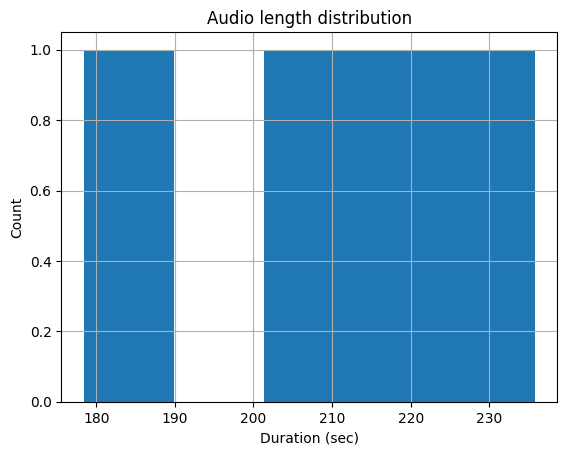

探索完成.


In [1]:
# 1_data_exploration.ipynb

# ---
# 目的: 对 data/raw/ 下的音频做基本的可视化/统计
# 1. 查看有多少首歌, 每首多长
# 2. 如果有元数据(如流派/演唱者), 就统计一下
# 3. (可选) 播放某首歌并做简单波形图

import os
import librosa
import pandas as pd
import matplotlib.pyplot as plt

# 假设 data/raw/ 下放了你的 mp3 或 wav
AUDIO_FOLDER = "../data/raw/"

# 1. 列出音频
audio_files = [f for f in os.listdir(AUDIO_FOLDER) if f.endswith(".mp3") or f.endswith(".wav")]
print("找到音频文件:", audio_files)

durations = []
for afile in audio_files:
    path = os.path.join(AUDIO_FOLDER, afile)
    y, sr = librosa.load(path, sr=None)  # 不重采样
    duration_sec = len(y) / sr
    durations.append((afile, duration_sec))

df = pd.DataFrame(durations, columns=["filename", "duration_sec"])
print("音频时长统计:")
print(df)

# 2. 简单可视化
df["duration_sec"].hist(bins=5)
plt.xlabel("Duration (sec)")
plt.ylabel("Count")
plt.title("Audio length distribution")
plt.show()

# 3. (可选) 如果有 metadata/songs.csv, 可以加载
#    pd.read_csv("../data/metadata/songs.csv")

# 4. (可选) 播放其中一个文件, 需 Jupyter magic or IPython.display
# from IPython.display import Audio
# Audio(filename="../data/raw/some_song.mp3")

print("探索完成.")